In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

### Logistic Regression
**Single-class model**: fit the probability of data belonging to the class

$\log\frac{\hat{p}}{1 - \hat{p}} = h(x_1, ..., x_n),$

$h(x_1, ..., x_n) = \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n.$
- n: number of input features.
- x_1, ..., x_n: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (x_1, ..., x_n)$.
- $\theta = (\theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

**Decision rule** (adjustible):

- prediction = 1 if $\hat{p}$ $\ge$ 0.5
- prediction = 0 if $\hat{p}$ < 0.5

## Logistic Regression Example: The Iris Dataset

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- Import dataset using <code>sklearn.dataset.load_iris()</code>
- Explore the dataset: data description, feature names, data types, data histograms, scatter plots.
- Split the dataset into train_set and test_set
- Apply <code>sklearn.linear_model.LogisticRegression</code> to build a binary classifier on **Iris-Virginica**.
- Evaluate the performance of the model: Accuracy, cross-validation, precision vs. recall, confusion matrix...
- Visualize the model (show decision boundary)


In [2]:
# Load dataset
from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [14]:
# Explore the dataset
iris_data = iris['data']
iris_target = iris['target']
iris_df = pd.DataFrame(data=iris_data,
                       columns=iris['feature_names'])
iris_df['Species'] = iris_target
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


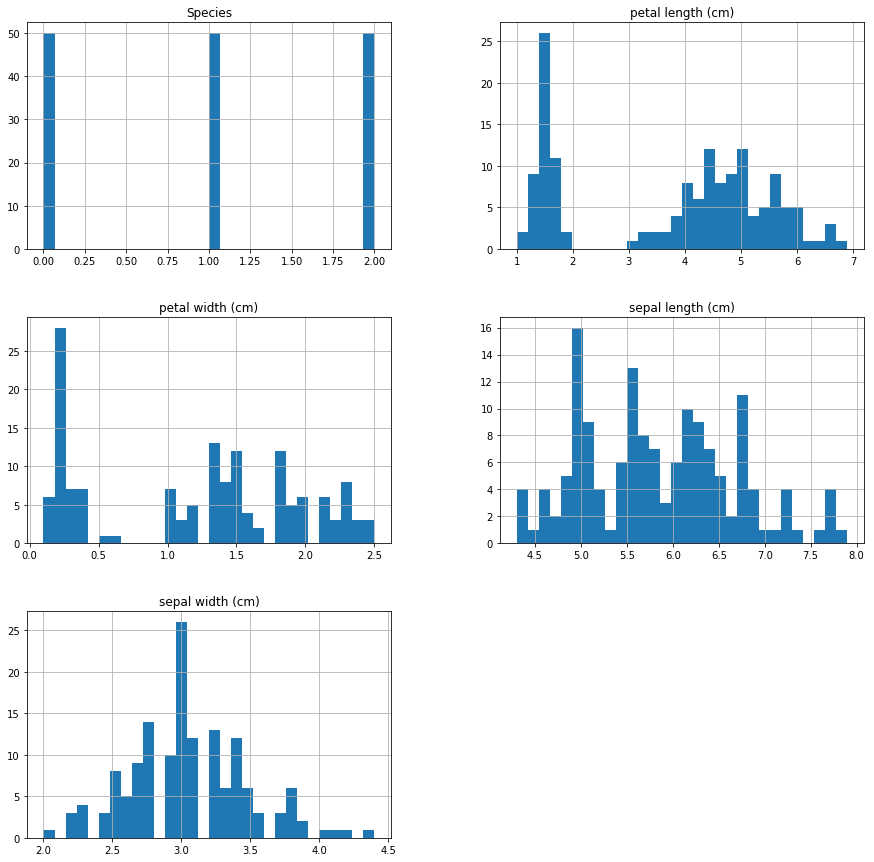

In [21]:
iris_df.hist(bins=30, figsize=[15, 15])
plt.show()

/home/liang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/liang/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/liang/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/liang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


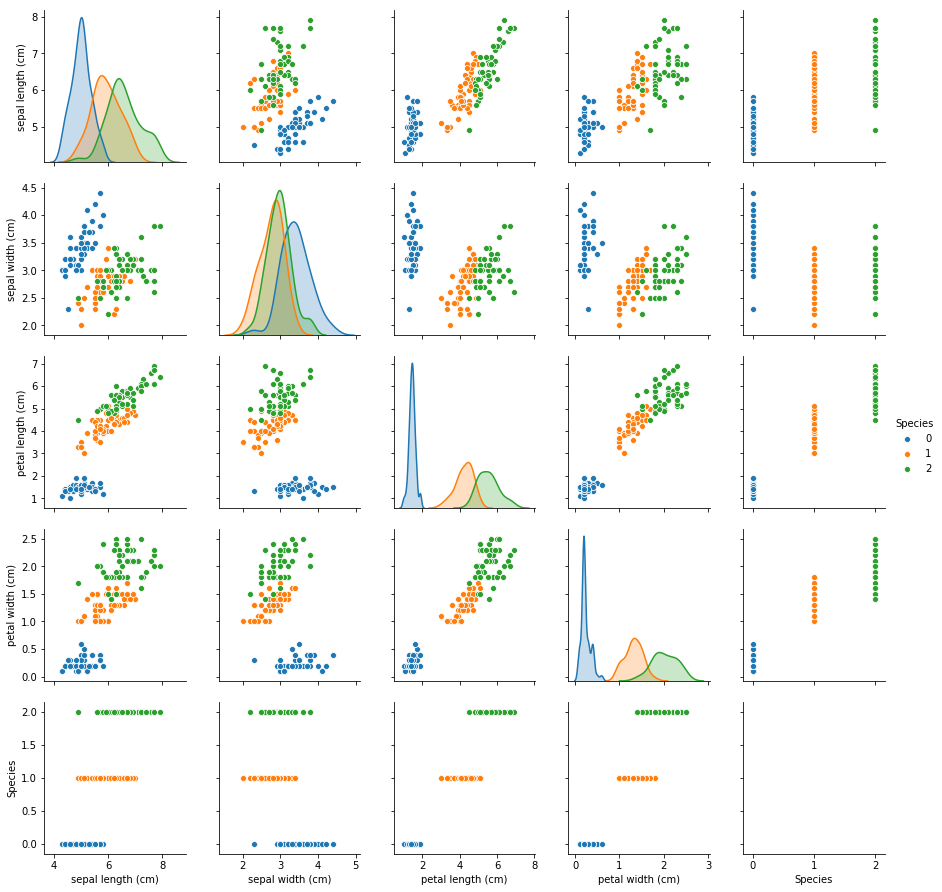

In [20]:
import seaborn as sns
sns.pairplot(iris_df, hue="Species")

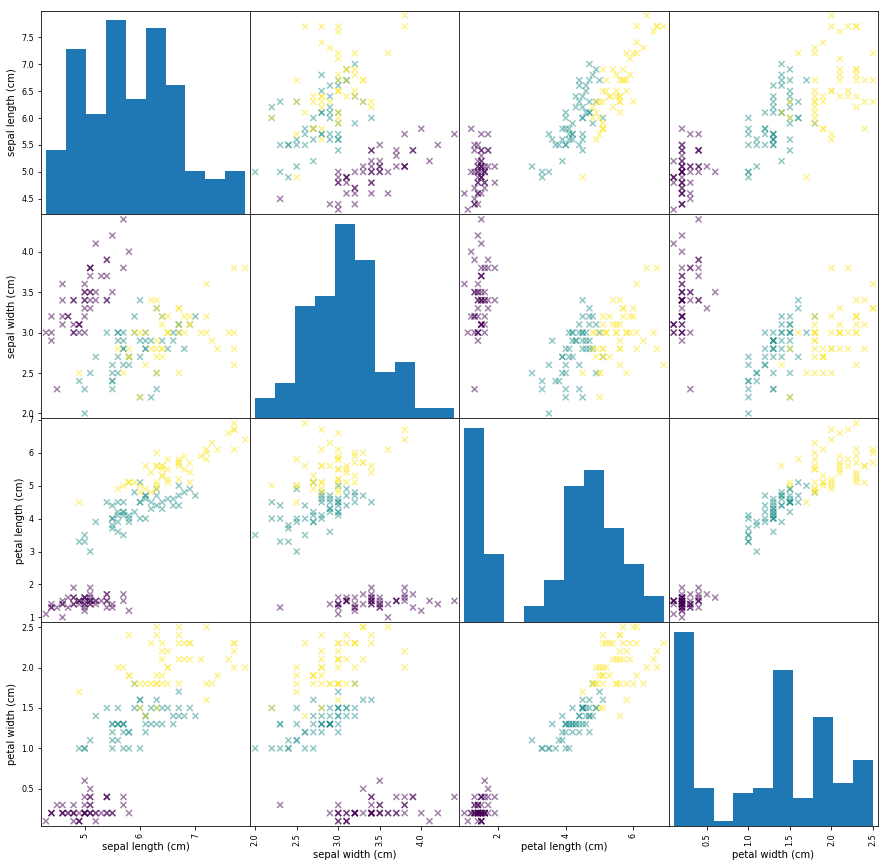

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df[iris['feature_names']],
               figsize=[15, 15],
               marker='x',
               c=iris_df['Species'])
plt.show()

In [26]:
# Train-test split
iris_df['isVirginica'] = iris_df['Species'] == 2
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(iris_df, test_size=0.15)
print(train_df.shape)
print(test_df.shape)

(127, 6)
(23, 6)


In [27]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(train_df[iris['feature_names']], train_df['isVirginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Model evaluation


In [7]:
# Model visualization


## Logistic Function $\sigma(t) = \frac{1}{1+e^{-t}}$

1. What is the range of the logistic function?

2. What can we say about the value of $h(x_1, ..., x_n) (=\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n)$ if $\hat{p}\ge 0.5$?

3. What can we say about the value of $h(x_1, ..., x_n) (=\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n)$ if $\hat{p}< 0.5$?

In [8]:
# Plot the graph of logistic function over interval [-10, 10]


## Model Training

**Cost (loss) function** for logistic regression:

\begin{equation}
c(\theta) = \left\{
\begin{array}{cc}
-\log(\hat{p}) & \textit{if }y=1,\\
-\log(1-\hat{p}) & \textit{if }y=0.
\end{array}
\right.
\end{equation}

The cost function $c(\theta)$:

- small if $y=1$ (data example belongs to the class) and $\hat{p}$ is close to 1.
- small if $y=0$ (data example does not belong to the class) and $\hat{p}$ is close to 0.
- is a convex function no matter what $y$ is.

**Uniformed expression for the cost function**:

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\big]$

- $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
- There is no equivalent of the Normal Equation.
- $J(\theta)$ is a convex function.
- $\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\big(\sigma(\textbf{x}^{(i)}\cdot\theta^T) - y^{(i)}\big)x_j^{(i)}$.

**Question**: Why not use the mean-square-error (SME) cost function?

## Logistic Regression for Multiple Classes (Softmax regression)
**model**:

$\hat{p}_k = \frac{\exp(s_k(\textbf{x}))}{\sum_{i=1}^K\exp(s_i(\textbf{x}))}$.

$s_k(\textbf{x}) = \textbf{x}\cdot\theta_k^T$

- $\hat{p}_k$ is the probability that the instance belongs to class $k$.
- K is the number of classes.
- $\theta_k$ is the coefficient vector associated with class $k$. All these vectors are stored as rows in a parameter matrix $\Theta$.
- The softmax classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

**Cross entropy cost function**

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K
y_k^{(i)}\log(\hat{p}_k^{(i)})$

- $y_k^{(i)}$ is equal to 1 if the target for the i-th instance is $k$; otherwise, it is equal to 0.


## Homework:

1. Build a logistic classifier to identify Iris-Setosa based only on its petal width. Divide the dataset randomly into 80% training set and 20% test set, show accuracy on test set.
2. Visualize the model by showing the probability curve and decision boundary.